In [1]:
using Distributions, Plots, StatsPlots
theme(:ggplot2)
include("ChangePoint.jl")

Main.ChangePoint

Main.ChangePoint.pars(0.9, 1.0, 0.75, 4.0, 10.0)


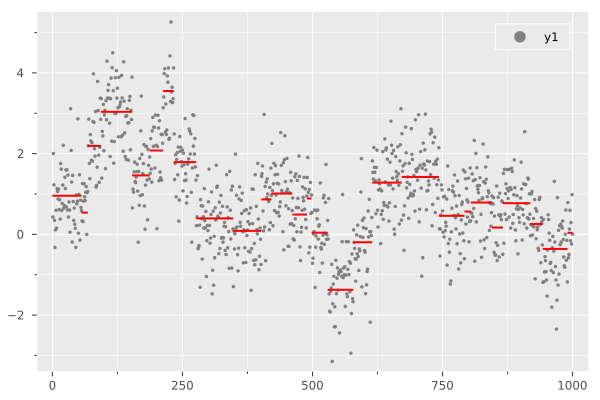

In [3]:
ζ,y = ChangePoint.SimData(seed=1313);ChangePoint.ProcObsGraph(ζ,y)

In [4]:
hcat(ζ.τ,ζ.ϕ)

27×2 Matrix{Float64}:
   0.0      0.956498
  55.9142   0.539002
  68.1826   2.19088
  93.2283   3.03694
 153.269    1.46158
 187.077    2.07654
 212.846    3.55291
 233.497    1.78949
 276.557    0.395156
 347.837    0.0858782
 401.627    0.866586
 420.991    1.01118
 461.426    0.49178
   ⋮       
 529.205   -1.37382
 578.53    -0.19644
 614.827    1.28258
 671.714    1.42338
 743.051    0.460655
 792.194    0.56605
 804.402    0.789274
 845.154    0.169373
 866.188    0.771521
 918.705    0.257757
 942.673   -0.36149
 990.241    0.0383153

In [5]:
function loss(y,t0,t1,τ)
    n = length(τ)
    extendedτ = [[t0];τ;[t1]]
    l = 0.0
    for i = 1:(n+1)
        index = findall(extendedτ[i] .< y.t .< extendedτ[i+1])
        l += sum((y.y[index] .- mean(y.y[index])).^2)
    end
    return l/length(findall(t0 .< y.t .< t1))
end

loss (generic function with 1 method)

In [27]:
τ = collect(900.5:0.1:999.5);
lvec = loss.(Ref(y),Ref(900.0),Ref(1000.0),τ);

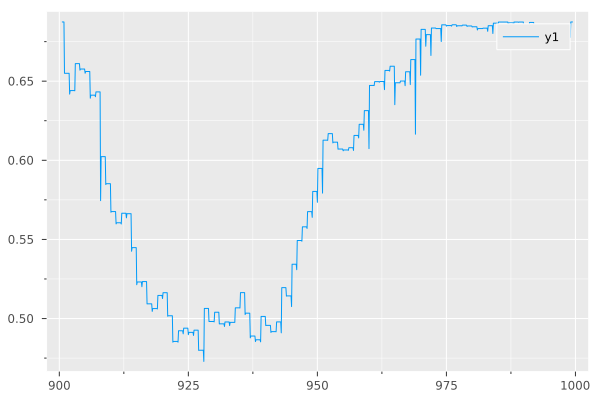

In [28]:
plot(τ,lvec)

In [42]:
_,index = findmin(lvec)
τ[index]

68.0

In [55]:
loss(y,0.0,100.0,[56.0,10.0])

1.1343459007359868

In [44]:
ζ.τ

27-element Vector{Float64}:
   0.0
  55.91424165806204
  68.1826051268074
  93.22832013156915
 153.26918347377077
 187.0772998176509
 212.84645960461717
 233.49734283393695
 276.557439082307
 347.8369048600534
 401.62676485004994
 420.99132529964186
 461.4256271841396
   ⋮
 529.2050560937563
 578.5304378970434
 614.8265843056454
 671.7140395137012
 743.0509857419836
 792.1939987673195
 804.4016329730778
 845.1538428270454
 866.1882010263388
 918.7054059210308
 942.6728067690626
 990.2407487494278

In [56]:
using Optim